## MSLA Data analaysis assessment on Employee Analysis

###### This notebook  looks into using python and some of its libraries to clean, analyze and visualize data
###### Given Human resource dataset with different attributes of employees having 37408 entries and 13 attributes


### 0. Importing and reading data


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, timezone, time
plt.style.use('ggplot')
pd.set_option('max_columns',400)# it enables us view every column in the dataset at once

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Handling other missing values
missing_values = ['N\a','na','NaT',np.nan]
# loading the dataset
hr = pd.read_csv("Human Resources.csv", na_values=missing_values)
hr

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,6/4/1991,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,1/20/2002,NaN,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,6/29/1984,Male,White,Business Development,Business Analyst,Headquarters,4/8/2019,NaN,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,7/29/1989,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,10/12/2010,NaN,Cleveland,Ohio
3,00-0055274,Baxy,Matton,9/14/1982,Female,White,Services,Service Tech,Headquarters,4/10/2005,NaN,Cleveland,Ohio
4,00-0076100,Terrell,Suff,4/11/1994,Female,Two or More Races,Product Management,Business Analyst,Remote,9/29/2010,2029-10-29 06:09:38 UTC,Flint,Michigan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
hr.isna().sum()


id                15194
first_name        15194
last_name         15194
birthdate         15194
gender            15194
race              15194
department        15194
jobtitle          15141
location          15194
hire_date         15194
termdate          33479
location_city     15194
location_state    15194
dtype: int64

### 1. Understanding the Data

In [5]:
# the size of the data
hr.shape

(37408, 13)

In [6]:
hr.head(10)

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,6/4/1991,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,1/20/2002,NaN,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,6/29/1984,Male,White,Business Development,Business Analyst,Headquarters,4/8/2019,NaN,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,7/29/1989,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,10/12/2010,NaN,Cleveland,Ohio
3,00-0055274,Baxy,Matton,9/14/1982,Female,White,Services,Service Tech,Headquarters,4/10/2005,NaN,Cleveland,Ohio
4,00-0076100,Terrell,Suff,4/11/1994,Female,Two or More Races,Product Management,Business Analyst,Remote,9/29/2010,2029-10-29 06:09:38 UTC,Flint,Michigan
5,00-0116166,Kacie,Offiler,1/18/1971,Male,Asian,Engineering,Developer III,Headquarters,9/1/2018,NaN,Cleveland,Ohio
6,00-0363185,Sandro,Admans,11/19/1979,Male,Two or More Races,Product Management,Quality Engineer,Headquarters,11/8/2012,NaN,Cleveland,Ohio
7,00-0380704,Eugene,Lehrahan,10/14/1988,Female,Black or African American,Engineering,Developer I,Headquarters,6/27/2007,NaN,Cleveland,Ohio
8,00-0381660,Wainwright,Corfield,12/13/1996,Male,Asian,Engineering,Business Systems Development Analyst,Headquarters,2/20/2001,2008-12-05 01:21:48 UTC,Cleveland,Ohio
9,00-0419202,Dyann,Isoldi,3/27/1980,Male,Two or More Races,Engineering,Web Developer I,Headquarters,1/27/2005,NaN,Cleveland,Ohio


In [7]:
#listing the columns
hr.columns

Index(['id', 'first_name', 'last_name', 'birthdate', 'gender', 'race',
       'department', 'jobtitle', 'location', 'hire_date', 'termdate',
       'location_city', 'location_state'],
      dtype='object')

In [8]:
# checking for the datatypes
hr.dtypes

id                object
first_name        object
last_name         object
birthdate         object
gender            object
race              object
department        object
jobtitle          object
location          object
hire_date         object
termdate          object
location_city     object
location_state    object
dtype: object

In [9]:
hr.describe() #display statistics information about the numerical data in the dataset

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
count,22214,22214,22214,22214,22214,22214,22214,22267,22214,22214,3929,22214,22214
unique,22214,7758,17754,10854,3,7,13,185,2,7016,3929,77,7
top,95-1363519,Cassie,Ducker,5/9/1972,Male,White,Engineering,Research Assistant II,Headquarters,7/8/2008,2019-09-30 09:00:43 UTC,Cleveland,Ohio
freq,1,12,7,9,11288,6328,6686,754,16715,10,1,16871,18025


### 2. Data Preparation
###### * Dropping irrelevant columns and rows
###### * Identifying Duplicated Columns
###### * Feature Creation

In [10]:
hr.head()

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,6/4/1991,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,1/20/2002,NaN,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,6/29/1984,Male,White,Business Development,Business Analyst,Headquarters,4/8/2019,NaN,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,7/29/1989,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,10/12/2010,NaN,Cleveland,Ohio
3,00-0055274,Baxy,Matton,9/14/1982,Female,White,Services,Service Tech,Headquarters,4/10/2005,NaN,Cleveland,Ohio
4,00-0076100,Terrell,Suff,4/11/1994,Female,Two or More Races,Product Management,Business Analyst,Remote,9/29/2010,2029-10-29 06:09:38 UTC,Flint,Michigan


In [11]:
# dropping irrelevant column
hr = hr.drop(['termdate'], axis =1)

In [12]:
# changing the following columns datatypes
hr['birthdate'] = pd.to_datetime(hr['birthdate'])
hr['hire_date'] = pd.to_datetime(hr['hire_date'])


In [13]:
hr.dtypes

id                        object
first_name                object
last_name                 object
birthdate         datetime64[ns]
gender                    object
race                      object
department                object
jobtitle                  object
location                  object
hire_date         datetime64[ns]
location_city             object
location_state            object
dtype: object

In [14]:
# checking for missing values
hr.isna().sum()

id                15194
first_name        15194
last_name         15194
birthdate         15194
gender            15194
race              15194
department        15194
jobtitle          15141
location          15194
hire_date         15194
location_city     15194
location_state    15194
dtype: int64

<AxesSubplot:>

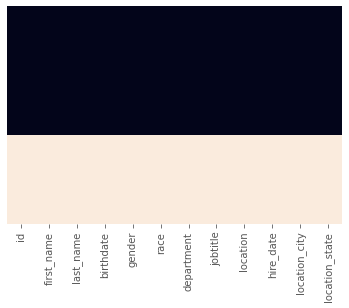

In [15]:
sns.heatmap(hr.isnull(),yticklabels=False,cbar=False)

In [16]:
#checking for duplicated data
hr.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
37403     True
37404     True
37405     True
37406     True
37407     True
Length: 37408, dtype: bool

In [17]:
hr.loc[hr.duplicated(subset=['first_name'])]

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,location_city,location_state
189,00-8712138,Gabie,Lawleff,1968-08-30,Female,Hispanic or Latino,Training,Senior Trainer,Remote,2004-05-10,Dayton,Ohio
214,00-9519379,Lorianna,Hayley,1993-05-30,Male,Two or More Races,Engineering,Programmer IV,Headquarters,2012-10-01,Cleveland,Ohio
233,01-0348994,Wainwright,Osban,1987-05-14,Male,Native Hawaiian or Other Pacific Islander,Sales,Solutions Engineer Manager,Remote,2001-11-14,Fort Wayne,Indiana
248,01-0770833,Louise,Spottiswoode,1993-02-22,Male,Asian,Sales,Solutions Engineer Manager,Headquarters,2019-05-14,Cleveland,Ohio
255,01-1215079,Maribelle,Shankster,1996-08-02,Male,American Indian or Alaska Native,Human Resources,Human Resources Analyst,Remote,2012-10-10,Bethlehem,Pennsylvania
...,...,...,...,...,...,...,...,...,...,...,...,...
37403,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
37404,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
37405,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
37406,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [18]:
hr.duplicated(subset=['id','first_name','last_name','birthdate','gender','race','department','jobtitle','location','hire_date','location_city','location_state']).sum()

15190

In [19]:
# Removing the duplicates
~hr.duplicated(subset=['id','first_name','last_name','birthdate','gender','race','department','jobtitle','location','hire_date','location_city','location_state']).sum()

-15191

In [20]:
~hr.duplicated(subset=['id','first_name','last_name','birthdate','gender','race','department','jobtitle','location','hire_date','location_city','location_state'])

0         True
1         True
2         True
3         True
4         True
         ...  
37403    False
37404    False
37405    False
37406    False
37407    False
Length: 37408, dtype: bool

In [21]:
hr = hr.loc[~hr.duplicated(subset=['id','first_name','last_name','birthdate','gender','race','department','jobtitle','location','hire_date','location_city','location_state'])].reset_index(drop=True).copy()

In [22]:
hr

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,location_city,location_state
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,2019-04-08,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,2010-10-12,Cleveland,Ohio
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,2005-04-10,Cleveland,Ohio
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,Flint,Michigan
...,...,...,...,...,...,...,...,...,...,...,...,...
22213,99-9963543,Carroll,Chattaway,1999-07-10,Female,White,Engineering,Software Engineer III,Remote,2018-03-27,Fort Wayne,Indiana
22214,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
22215,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Support Staff II,NaN,NaT,NaN,NaN
22216,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Assistant Manager,NaN,NaT,NaN,NaN


In [23]:
# checking for missing values
hr.isnull().sum()

id                4
first_name        4
last_name         4
birthdate         4
gender            4
race              4
department        4
jobtitle          1
location          4
hire_date         4
location_city     4
location_state    4
dtype: int64

In [24]:
hr.tail()

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,location_city,location_state
22213,99-9963543,Carroll,Chattaway,1999-07-10,Female,White,Engineering,Software Engineer III,Remote,2018-03-27,Fort Wayne,Indiana
22214,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
22215,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Support Staff II,NaN,NaT,NaN,NaN
22216,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Assistant Manager,NaN,NaT,NaN,NaN
22217,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Support Staff III,NaN,NaT,NaN,NaN


In [25]:
# dropping missing values
hr = hr.drop([22214,22215,22216,22217], axis = 0)

In [26]:
hr.isnull().sum()

id                0
first_name        0
last_name         0
birthdate         0
gender            0
race              0
department        0
jobtitle          0
location          0
hire_date         0
location_city     0
location_state    0
dtype: int64

### 3. Feature Engineering

In [27]:
hr['jobtitle'].unique()

array(['Programmer Analyst I', 'Business Analyst',
       'Solutions Engineer Manager', 'Service Tech', 'Developer III',
       'Quality Engineer', 'Developer I',
       'Business Systems Development Analyst', 'Web Developer I',
       'Service Tech II', 'Research Assistant II', 'Analyst Programmer',
       'Staff Accountant III', 'Software Engineer I', 'Senior Attorney',
       'Data Visualization Specialist', 'Senior Editor',
       'Software Consultant', 'Financial Analyst', 'Service Manager',
       'Senior Recruiter', 'HR Manager', 'Trainer III', 'Programmer III',
       'Training Manager', 'Pre-Sales Consultant', 'Data Coordiator',
       'Administrative Assistant II', 'Relationshiop Manager',
       'Human Resources Analyst', 'Desktop Support Technician',
       'Operator', 'Tax Accountant', 'Service Tech III',
       'Senior Developer', 'Service Coordinator', 'Senior Trainer',
       'Research Assistant I', 'Support Staff II',
       'Systems Administrator I', 'Content Develope

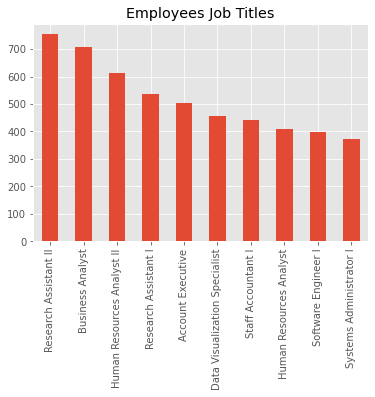

In [28]:
hr['jobtitle'].value_counts() \
.head(10) \
.plot(kind='bar', title="Employees Job Titles")
plt.show()


###### Check for the number of employees by location

In [29]:

employees_by_location = hr.location.value_counts()
employees_by_location

Headquarters    16715
Remote           5499
Name: location, dtype: int64

<AxesSubplot:>

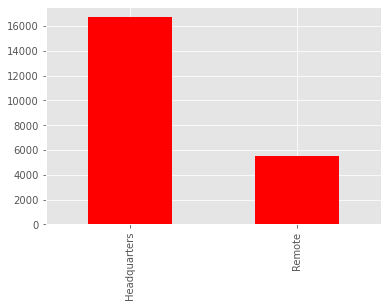

In [30]:
employees_by_location.plot(kind='bar', color ='red')

###### Employees preferred office location in major cities

In [31]:

employees_by_locationcity = hr.location_city.value_counts()
employees_by_locationcity[:20]

Cleveland       16871
Chicago           351
Philadelphia      326
Pittsburgh        293
Cincinnati        285
Louisville        228
Detroit           203
Dayton            202
Indianapolis      200
Lexington         199
Columbus          177
Springfield       168
Milwaukee         168
Fort Wayne        143
Madison           141
Toledo            131
Peoria            131
Akron             129
Evansville        115
Erie              108
Name: location_city, dtype: int64

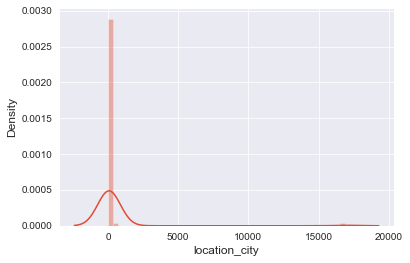

In [32]:
sns.set_style('darkgrid')
sns.distplot(employees_by_locationcity)
plt.show()

###### Checking for the race with highest percentage of employees 

In [33]:
hr['race'].unique()

array(['Hispanic or Latino', 'White', 'Black or African American',
       'Two or More Races', 'Asian', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

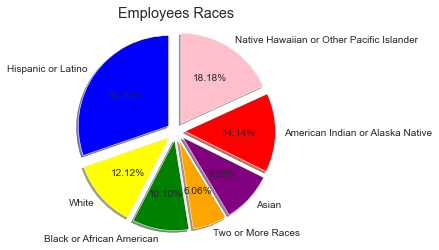

In [34]:
import matplotlib.pyplot as plt

labels= ['Hispanic or Latino', 'White', 'Black or African American', 'Two or More Races', 'Asian', 'American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander']

colors=['blue', 'yellow', 'green', 'orange','purple','red','pink']

sizes= [1500, 600, 500, 300, 450, 700, 900]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1), autopct='%1.2f%%')

plt.title('Employees Races')

plt.axis('equal')

plt.show()